In [1]:
import os
import sys
import warnings

import pandas as pd

sys.path.append("..")

from src.pickle_manager import open_pickle
from src.evaluation import evaluate_model

warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
from sklearn.decomposition import PCA
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline

import umap
import umap.plot

/opt/conda/envs/stat_env/lib/python3.11/site-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


In [3]:
rf = open_pickle(os.path.join("..", "data", "models"), "rf_classifier_first_year.pkl")
lr = open_pickle(os.path.join("..", "data", "models"), "log_reg_first_year.pkl")
xgb = open_pickle(os.path.join("..", "data", "models"), "xgb_classifier_first_year.pkl")
catboost = open_pickle(os.path.join("..", "data", "models"), "catboost_classifier_first_year.pkl")

data = open_pickle(os.path.join("..", "data", "pkls"), "processed_dataset_classification_first_year.pkl")
X_train, X_test, y_train, y_test = (
    data[0],
    data[1],
    data[2],
    data[3],
)

Classification Report for Logistic Regression (Train):
              precision    recall  f1-score   support

           0     0.7324    0.8452    0.7847   1605267
           1     0.8216    0.7328    0.7747   2089410
           2     0.9167    0.8912    0.9038    771314

    accuracy                         0.8006   4465991
   macro avg     0.8236    0.8231    0.8211   4465991
weighted avg     0.8060    0.8006    0.8006   4465991

Classification Report for Logistic Regression (Test):
              precision    recall  f1-score   support

           0     0.7331    0.8449    0.7851    401317
           1     0.8213    0.7335    0.7749    522352
           2     0.9157    0.8903    0.9028    192829

    accuracy                         0.8006   1116498
   macro avg     0.8233    0.8229    0.8209   1116498
weighted avg     0.8059    0.8006    0.8006   1116498



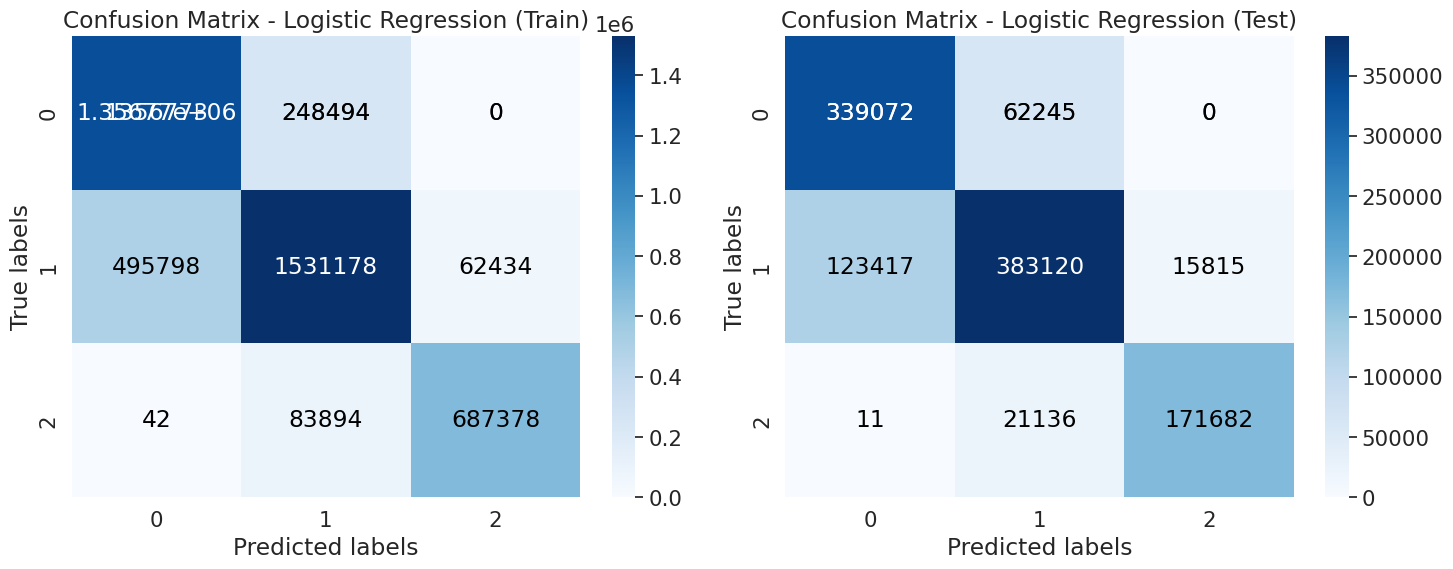

Classification Report for Random Forest (Train):
              precision    recall  f1-score   support

           0     0.7244    0.8796    0.7945   1605267
           1     0.8437    0.7149    0.7740   2089410
           2     0.9216    0.8920    0.9066    771314

    accuracy                         0.8047   4465991
   macro avg     0.8299    0.8288    0.8250   4465991
weighted avg     0.8143    0.8047    0.8042   4465991

Classification Report for Random Forest (Test):
              precision    recall  f1-score   support

           0     0.7242    0.8783    0.7939    401317
           1     0.8415    0.7140    0.7725    522352
           2     0.9187    0.8889    0.9035    192829

    accuracy                         0.8033   1116498
   macro avg     0.8281    0.8271    0.8233   1116498
weighted avg     0.8127    0.8033    0.8028   1116498



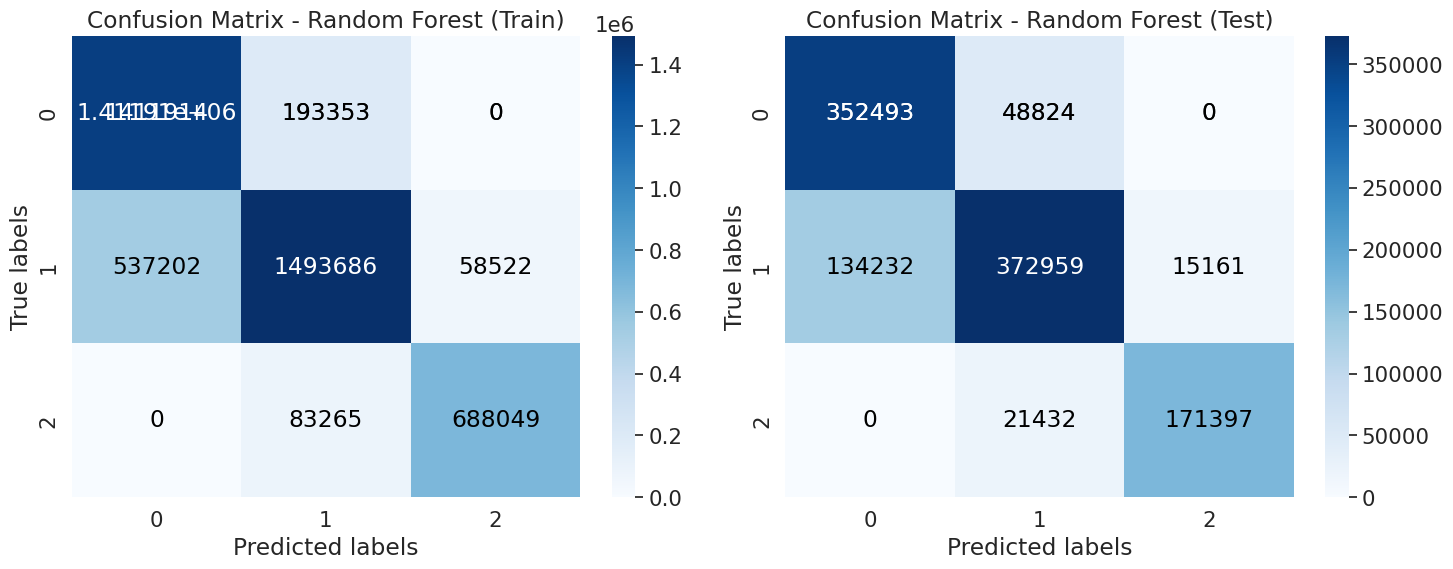

Classification Report for XGBoost (Train):
              precision    recall  f1-score   support

           0     0.7305    0.8689    0.7937   1605267
           1     0.8381    0.7245    0.7772   2089410
           2     0.9188    0.8935    0.9060    771314

    accuracy                         0.8056   4465991
   macro avg     0.8291    0.8290    0.8256   4465991
weighted avg     0.8133    0.8056    0.8054   4465991

Classification Report for XGBoost (Test):
              precision    recall  f1-score   support

           0     0.7301    0.8677    0.7930    401317
           1     0.8363    0.7239    0.7760    522352
           2     0.9171    0.8916    0.9041    192829

    accuracy                         0.8045   1116498
   macro avg     0.8278    0.8277    0.8244   1116498
weighted avg     0.8121    0.8045    0.8043   1116498



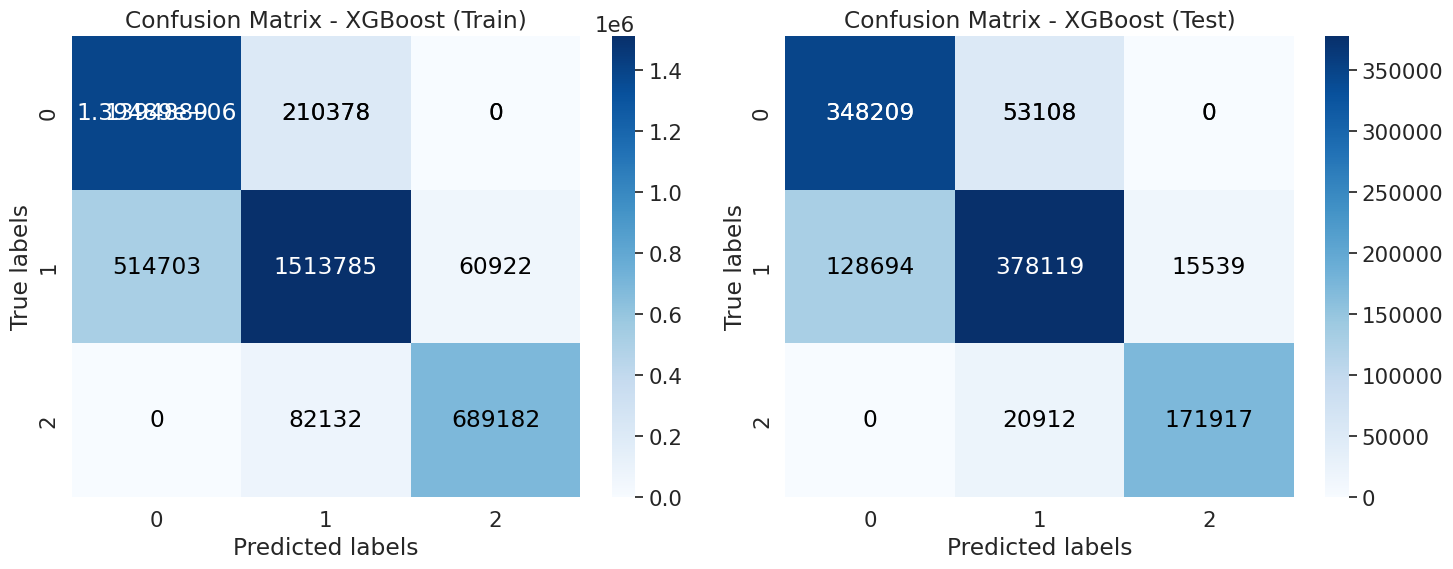

Classification Report for Catboost (Train):
              precision    recall  f1-score   support

           0     0.7256    0.7804    0.7520   1605267
           1     0.7721    0.7454    0.7585   2089410
           2     0.9193    0.8613    0.8894    771314

    accuracy                         0.7780   4465991
   macro avg     0.8057    0.7957    0.8000   4465991
weighted avg     0.7808    0.7780    0.7788   4465991

Classification Report for Catboost (Test):
              precision    recall  f1-score   support

           0     0.7262    0.7797    0.7520    401317
           1     0.7718    0.7460    0.7587    522352
           2     0.9187    0.8611    0.8890    192829

    accuracy                         0.7780   1116498
   macro avg     0.8056    0.7956    0.7999   1116498
weighted avg     0.7808    0.7780    0.7788   1116498



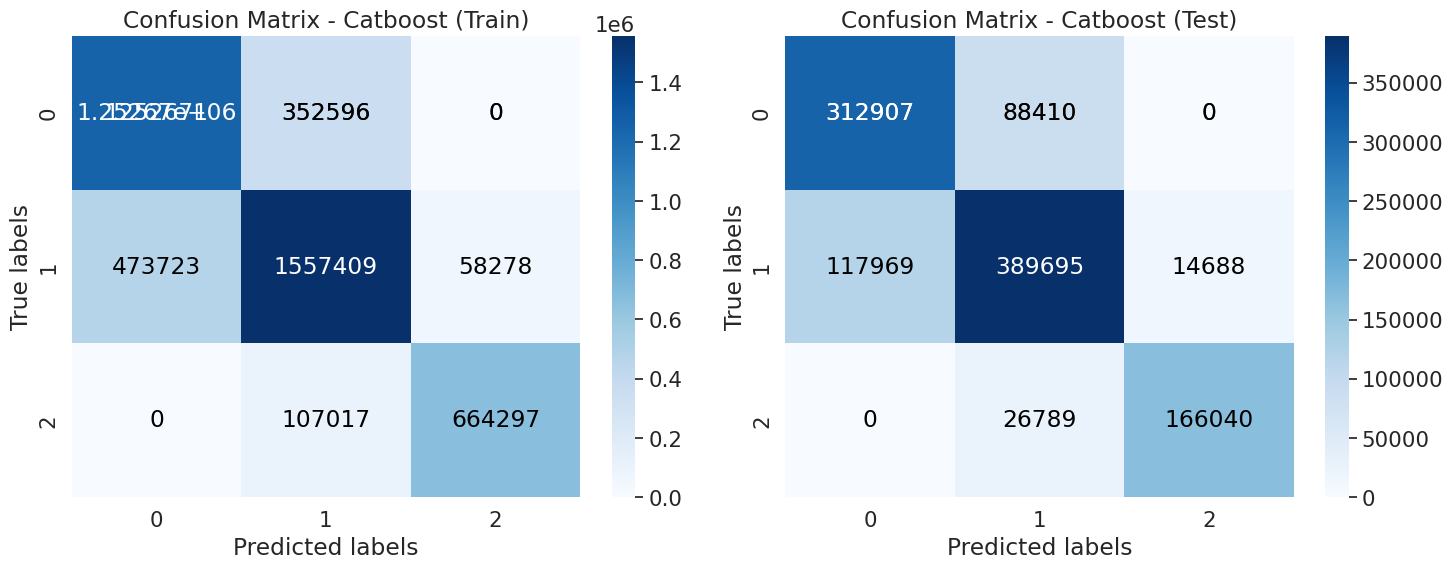

In [4]:
# Evaluate each model
for model, name in zip(
    [lr, rf, xgb, catboost], ["Logistic Regression", "Random Forest", "XGBoost", "Catboost"]
):
    evaluate_model(model, X_train, y_train, X_test, y_test, name)

## PCA, t-SNE & UMAP

In [5]:
# X = pd.concat([X_train, X_test], axis=0)
# y = np.concatenate([y_train, y_test], axis=0)

In [7]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test, y_test)

# Convert to data frame
principal_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])

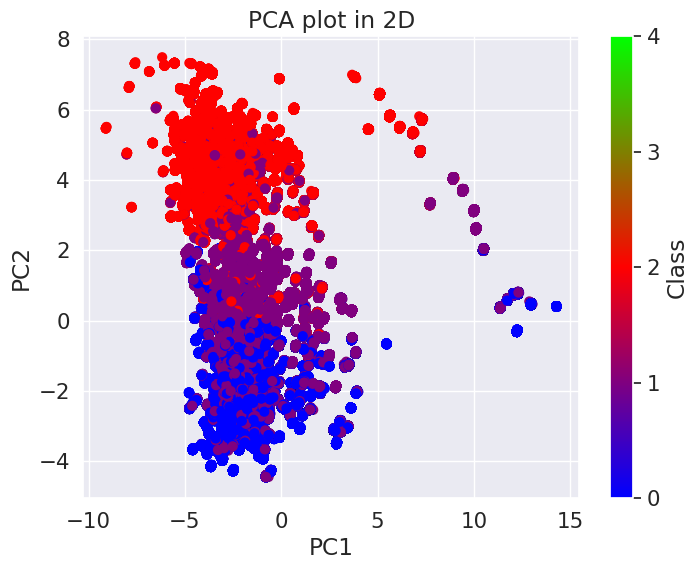

In [8]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], c=y_test, cmap="brg", s=40, vmin=0, vmax=4,)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
cbar = plt.colorbar(label='Class', ticks=[0, 1, 2, 3, 4])

In [ ]:
# UMAP
um = umap.UMAP()
X_umap = um.fit_transform(X_test)

# Convert to data frame
umap_df = pd.DataFrame(data = X_umap, columns = ['umap comp. 1', 'umap comp. 2'])

In [ ]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(umap_df.iloc[:,0], umap_df.iloc[:,1], c=y_test, cmap="brg", s=40, vmin=0, vmax=4,)

# Aesthetics
plt.title('UMAP plot in 2D')
plt.xlabel('umap component 1')
plt.ylabel('umap component 2')
cbar = plt.colorbar(label='Class', ticks=[0, 1, 2, 3, 4])